# House price prediction project

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the csv file into a dataframe
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# there are 81 columns, so to see them all seting the display option
# SalePrice is our target column

pd.pandas.set_option('display.max_columns', None) # none specifies total number of columns in the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

#### This shows that there are 1,640 records and 81 features in the dataset.

## This notebook contains the data analysis part of the project.

### Missing values

In [5]:
# checking for the null values

df.columns[df.isnull().any()] #returns the columns with null values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

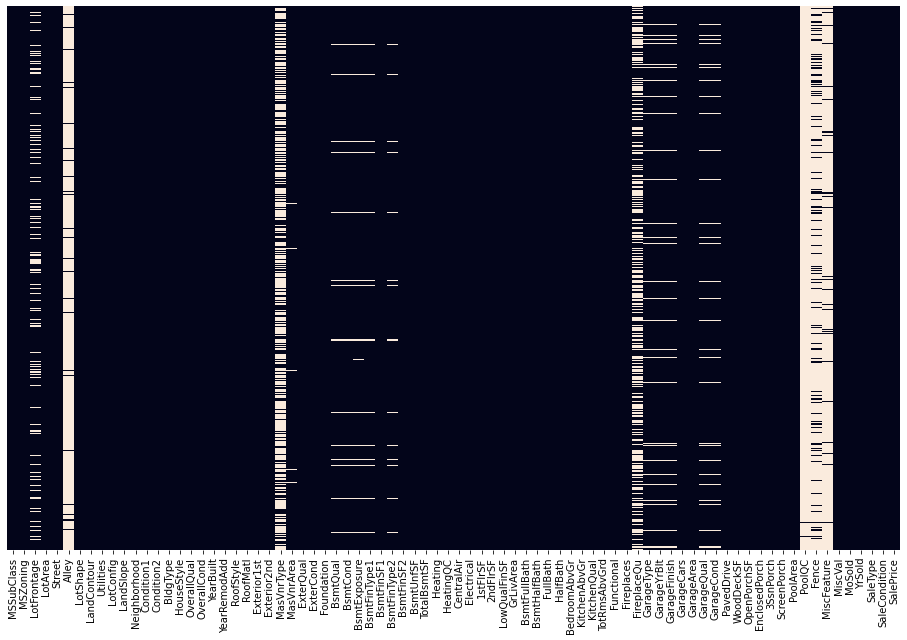

In [70]:
# visualize the missing values
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

#### Here, the missing values are represented by the white color in the figure, since the number of columns are quite large, the visualization is not quite clear. However, one can ge the idea from the chart.

In [5]:
# determining the % of null values in each column

features_with_null = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
#print(f"Count of features with null values: {features_with_null}")

for feature in features_with_null:
    print(feature,'==>', np.round(df[feature].isnull().sum()/df.shape[0]*100,3), '% missing values')

LotFrontage ==> 17.74 % missing values
Alley ==> 93.767 % missing values
MasVnrType ==> 59.726 % missing values
MasVnrArea ==> 0.548 % missing values
BsmtQual ==> 2.534 % missing values
BsmtCond ==> 2.534 % missing values
BsmtExposure ==> 2.603 % missing values
BsmtFinType1 ==> 2.534 % missing values
BsmtFinType2 ==> 2.603 % missing values
Electrical ==> 0.068 % missing values
FireplaceQu ==> 47.26 % missing values
GarageType ==> 5.548 % missing values
GarageYrBlt ==> 5.548 % missing values
GarageFinish ==> 5.548 % missing values
GarageQual ==> 5.548 % missing values
GarageCond ==> 5.548 % missing values
PoolQC ==> 99.521 % missing values
Fence ==> 80.753 % missing values
MiscFeature ==> 96.301 % missing values


#### From the above result, we can see that some features have large amount of missing values while some have it low. To identify if dropping those feature is a good idea or not, we have to first determine the relationship between that feature and the target column.

Plotting the relationship diagram

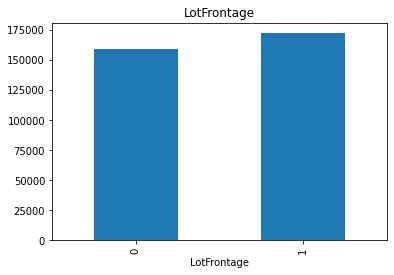

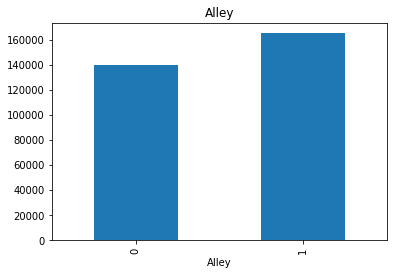

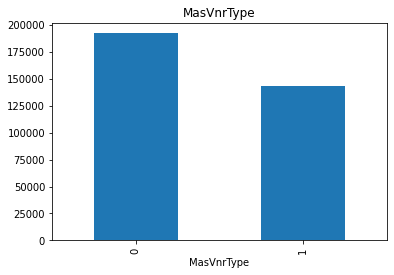

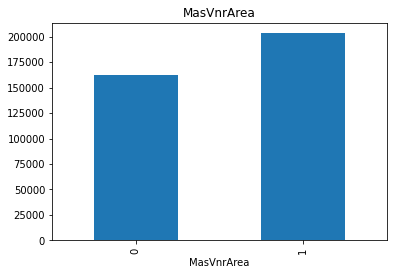

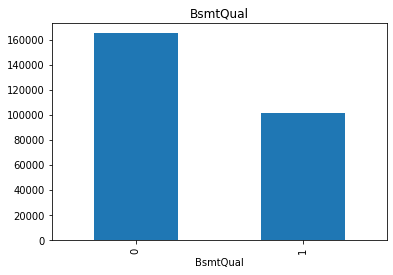

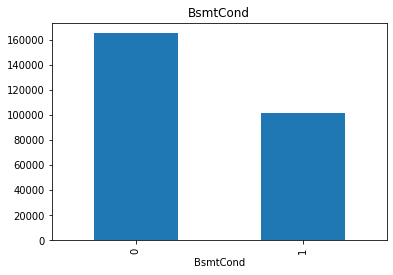

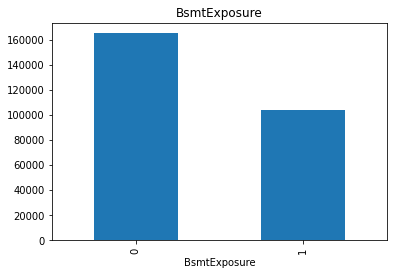

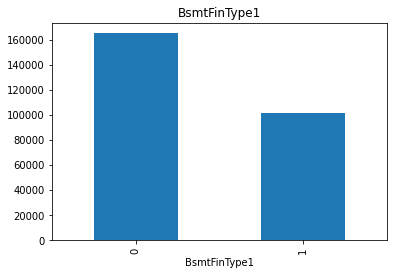

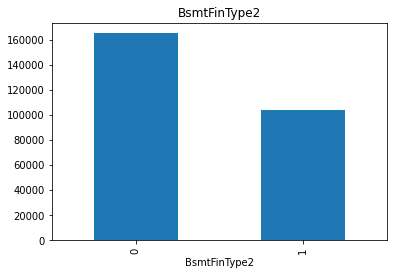

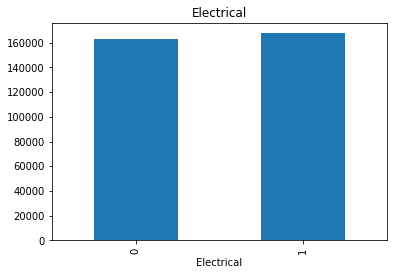

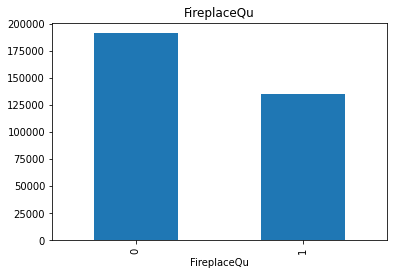

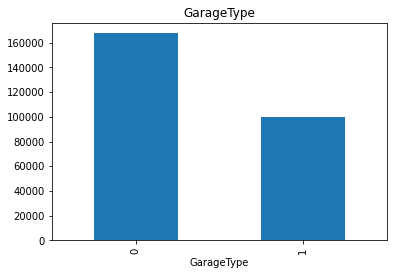

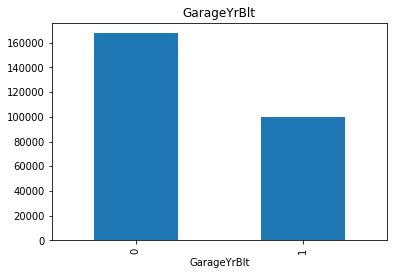

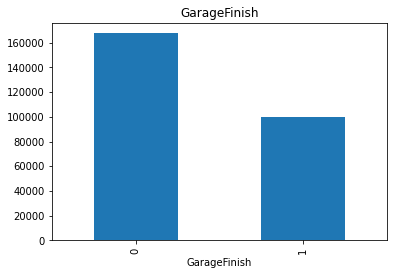

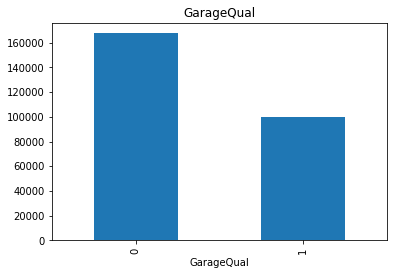

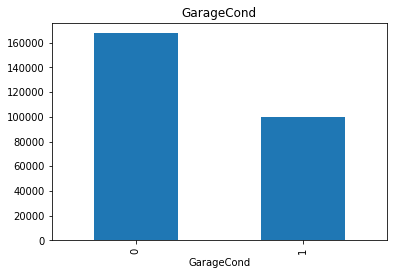

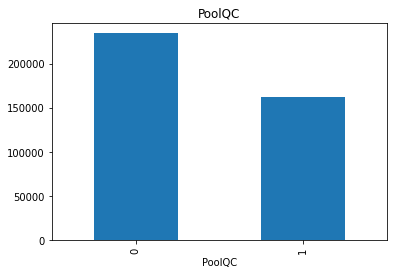

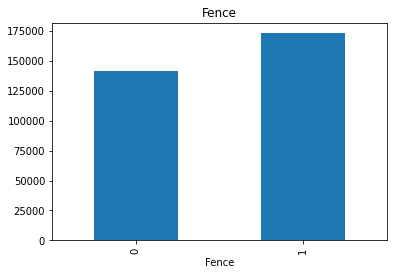

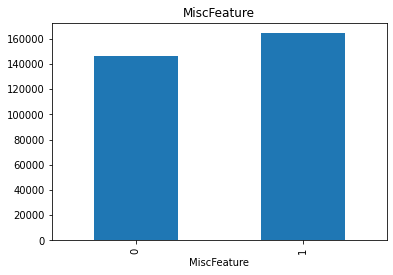

In [6]:
for feature in features_with_null:
    data = df.copy() #making a copy of the dataset
    
    #categorizing the null and not null values in the column with 1 and 0 respectively
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### For 6 features, the median salesprice is high for the missing values, thus the conclusion can be made that there is some relation between them with the dependent variable. Thus, suitable method is to be used to impute those values which will be done in feature engineering.

## Duplicates

In [51]:
df.duplicated().sum() # if 0, implies no any duplicate row present in the dataset

0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### This provides the basic infos like count of not null records, also there are 38 numeric columns and 43 non-numeric columns. 

In [55]:
df['Id'].nunique()

1460

In [7]:
# This shows that, ID is unique for each record and it is not necessary, thus dropping it from the dataset
df.drop('Id', axis=1, inplace=True)
df.shape

(1460, 80)

Statistical description of the dataset

In [62]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploring numeric variable

In [8]:
# getting the list of numeric columns

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns in the dataset: {len(numeric_cols)}") #result is 37 as, ID is already dropped

df[numeric_cols].head()

Numeric columns in the dataset: 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# here, there are some columns with datetime i.e. containing year, 
# extracting them such that it could be useful in analysis.

year_cols = [feature for feature in numeric_cols if 'Yr' in feature or 'Year' in feature]
print(year_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [10]:
for yr in year_cols:
    print(yr, '==>',df[yr].nunique(), "unique years")

YearBuilt ==> 112 unique years
YearRemodAdd ==> 61 unique years
GarageYrBlt ==> 97 unique years
YrSold ==> 5 unique years


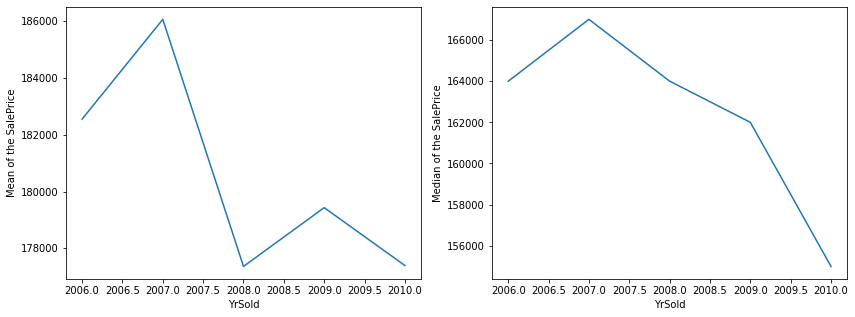

In [97]:
# based on the years, we can visualize the sales price

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df.groupby('YrSold')['SalePrice'].mean())
plt.ylabel('Mean of the SalePrice')
plt.xlabel('YrSold')

plt.subplot(1,2,2)
plt.plot(df.groupby('YrSold')['SalePrice'].median())
plt.ylabel('Median of the SalePrice')
plt.xlabel('YrSold')
plt.show()

#### The chart shows that with increase in years, the saleprice seems to have decreased. This doesnt provide any proper information.

In [11]:
df[year_cols].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


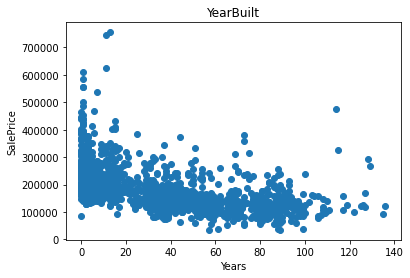

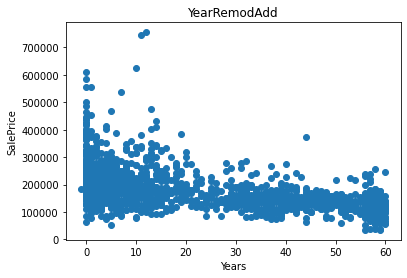

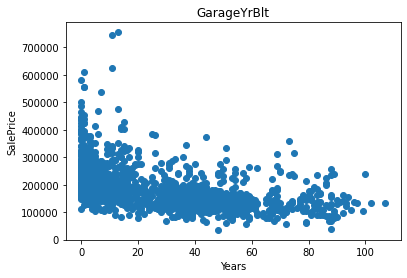

In [12]:
# lets find the age of the house and saleprice for each

for year in year_cols:
    if year != 'YrSold':
        data = df.copy()
        data[year] = data['YrSold']-data[year]
        
        plt.scatter(data[year], data['SalePrice'])
        plt.title(year)
        plt.xlabel('Years')
        plt.ylabel('SalePrice')
        plt.show()
        

#### This visualizations show that, when the difference between built and sold years are high, the sold price will be comparatively low.

## Likewise, there are two types of numeric variabels, one is continuous and the other is descrete.

In [13]:
# identifying different kinds of numeric variables
print(df[numeric_cols].nunique())

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64


In [14]:
# the results above shows the count of unique values in each numeric columns
# for this scenario lets consider, the descrete features should have less than 25 unique values

descrete_features = [feature for feature in numeric_cols if df[feature].nunique()<=25 and feature not in year_cols]
print(f"count of descrete featured: {len(descrete_features)}")

count of descrete featured: 17


Relationship between descrete features and SalePrice

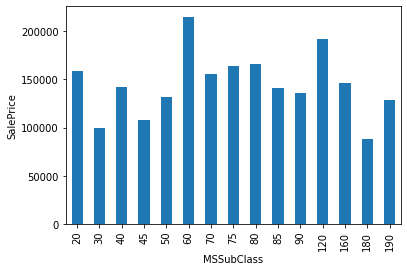

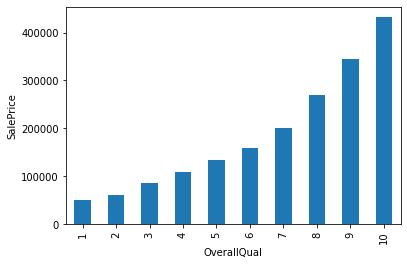

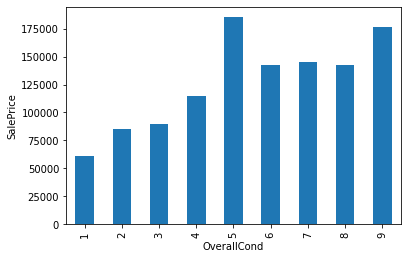

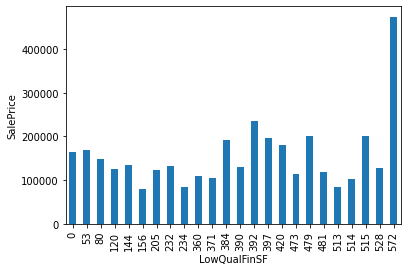

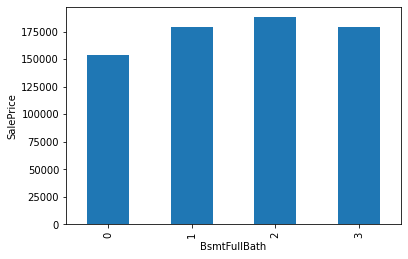

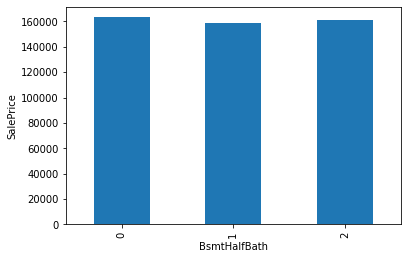

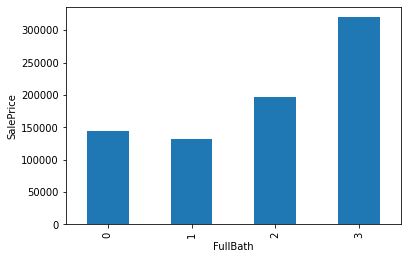

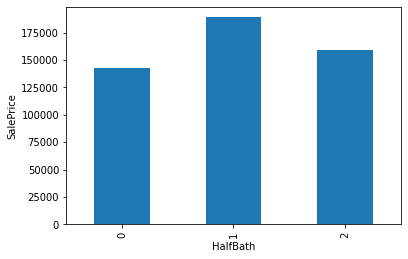

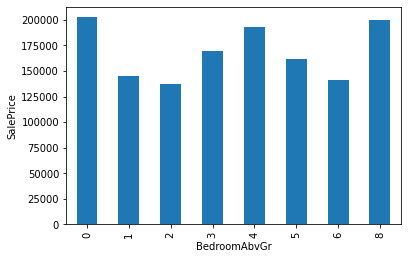

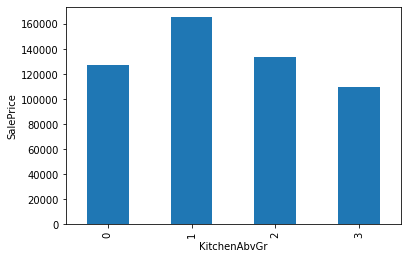

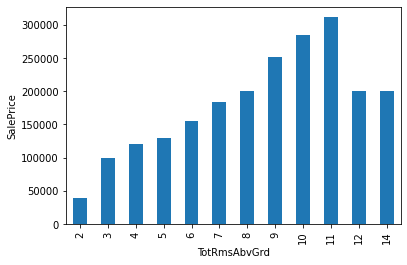

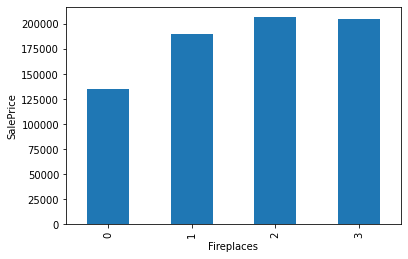

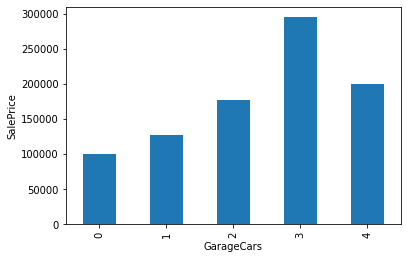

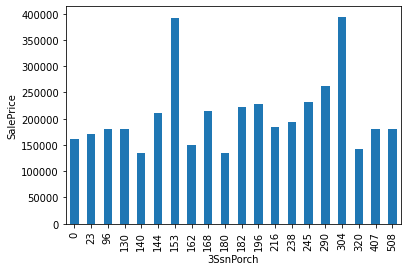

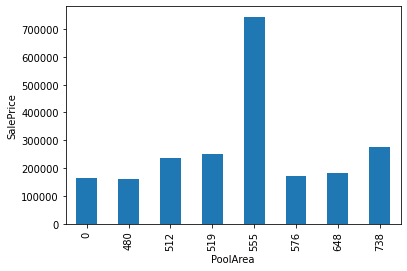

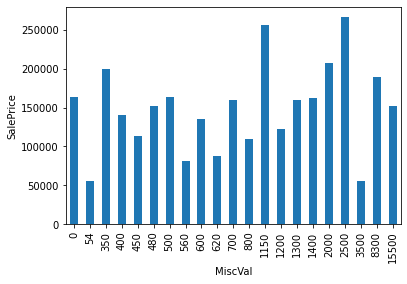

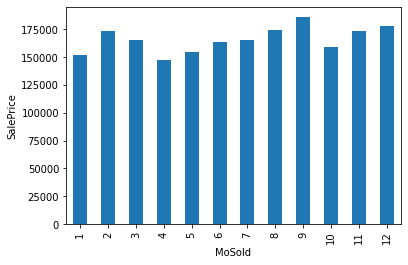

In [15]:
# to visualzie the descrete feature columns, bar chart can be used

for feature in descrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.show()

## Continuous variable

In [16]:
# analyzing the continuous variable

continuous_features = [feature for feature in numeric_cols if feature not in descrete_features+year_cols]
print("Count of continuous features: ",len(continuous_features))

Count of continuous features:  16


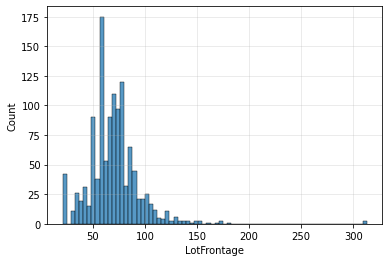

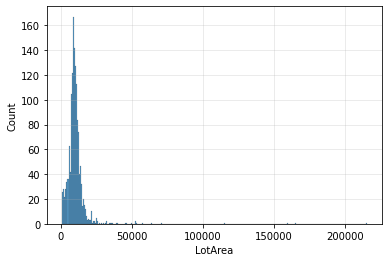

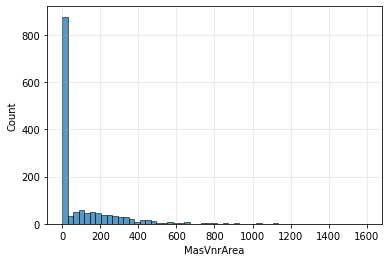

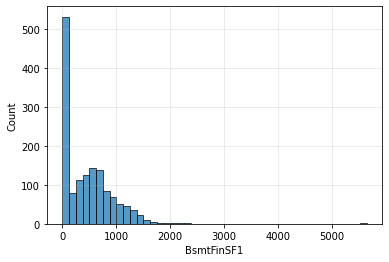

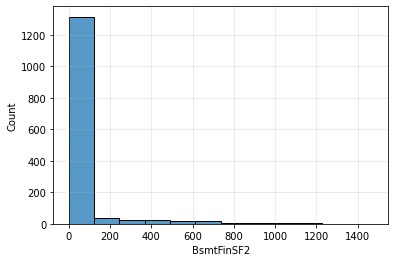

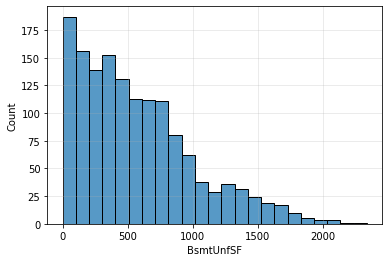

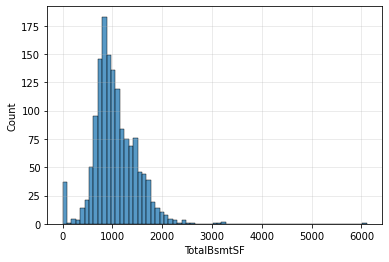

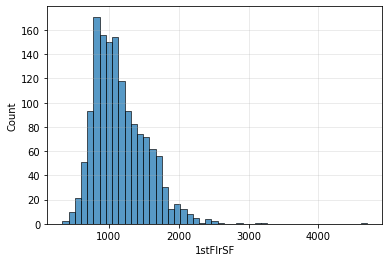

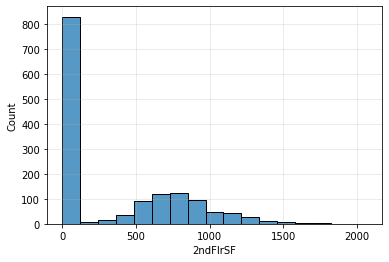

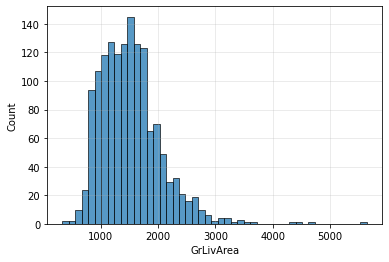

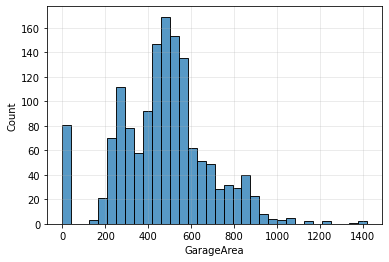

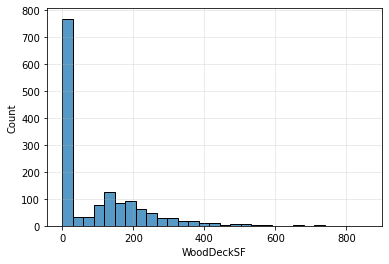

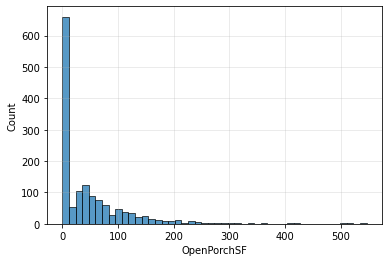

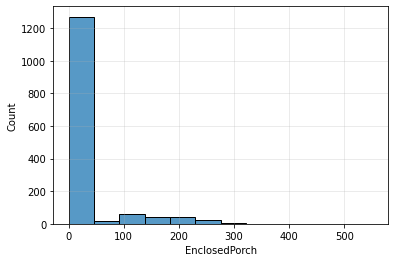

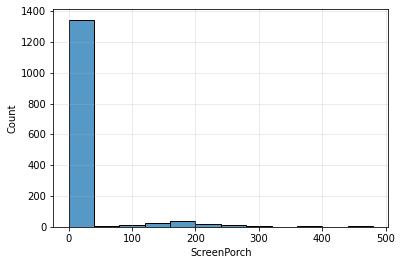

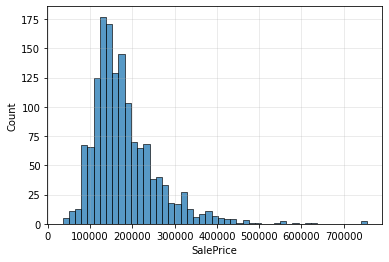

In [18]:
# histograms can be used to visualize the distribution of the continuous features

for feature in continuous_features:
    sns.histplot(data=df[feature])
    plt.grid(alpha=0.3)
    plt.show()
    

#### Here, most of the feature columns are right skewed. i.e. many values are concentrated towards to left side. Thus, here the mean is greater than median.

## Since, the continuous data are right skewed, it can be converted to normal distribution by using logarithmic transmission for better model performance.

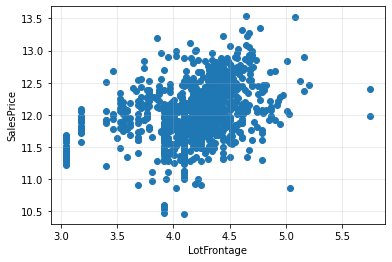

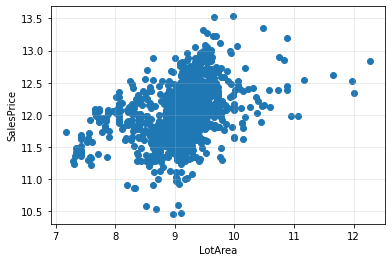

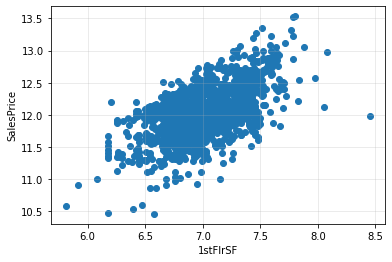

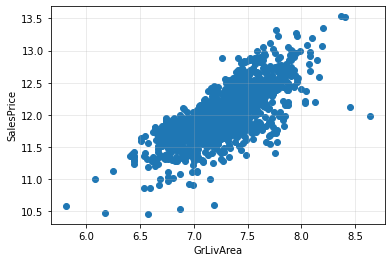

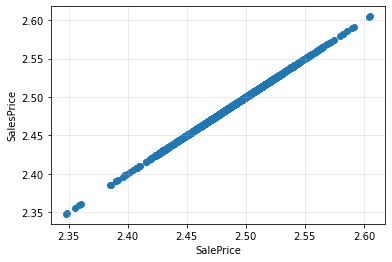

In [33]:
for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique(): #skipping the feature if it has 0 value, log of 0 is infinity
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.grid(alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.show()

#### It can be seen that with the increase in feature's value, the sales price aslo seems to increase.

Outliers visualization

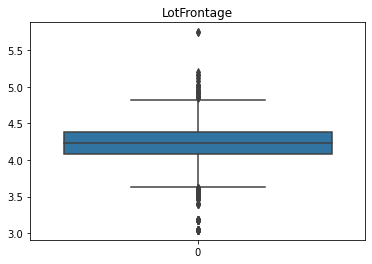

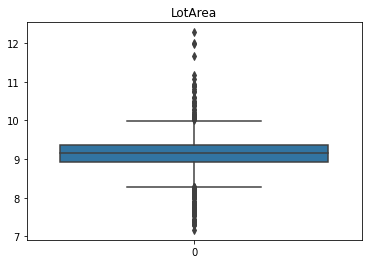

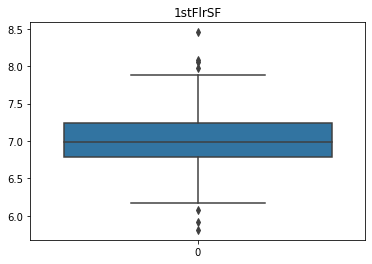

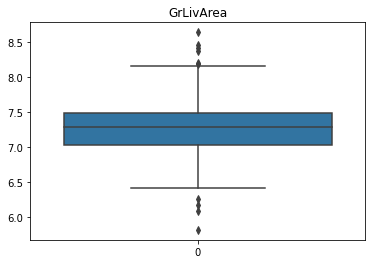

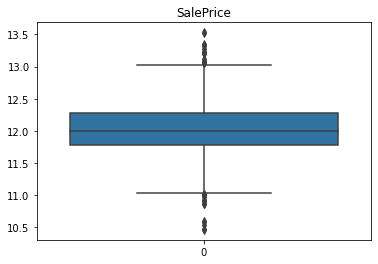

In [27]:
for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        sns.boxplot(data[feature])
        plt.title(feature)
        plt.show()

#### from the above box plots, we can see the outliers present in the continuous variable. It will have a significant impact on the mean thus median of dependent variable is used in most case.

## Categorical varibales

In [38]:
# creating a list of categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
print("There are {} categorical features".format(len(categorical_features)))
df[categorical_features].head()

There are 43 categorical features


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
for feature in categorical_features:
    print(feature, "==>", df[feature].nunique(), "unique categories")

MSZoning ==> 5 unique categories
Street ==> 2 unique categories
Alley ==> 2 unique categories
LotShape ==> 4 unique categories
LandContour ==> 4 unique categories
Utilities ==> 2 unique categories
LotConfig ==> 5 unique categories
LandSlope ==> 3 unique categories
Neighborhood ==> 25 unique categories
Condition1 ==> 9 unique categories
Condition2 ==> 8 unique categories
BldgType ==> 5 unique categories
HouseStyle ==> 8 unique categories
RoofStyle ==> 6 unique categories
RoofMatl ==> 8 unique categories
Exterior1st ==> 15 unique categories
Exterior2nd ==> 16 unique categories
MasVnrType ==> 3 unique categories
ExterQual ==> 4 unique categories
ExterCond ==> 5 unique categories
Foundation ==> 6 unique categories
BsmtQual ==> 4 unique categories
BsmtCond ==> 4 unique categories
BsmtExposure ==> 4 unique categories
BsmtFinType1 ==> 6 unique categories
BsmtFinType2 ==> 6 unique categories
Heating ==> 6 unique categories
HeatingQC ==> 5 unique categories
CentralAir ==> 2 unique categories
El

#### It can be seen that few categories has large number of categories while many have that upto 6.

Visualizing the relationship between the categorical feature and saleprice

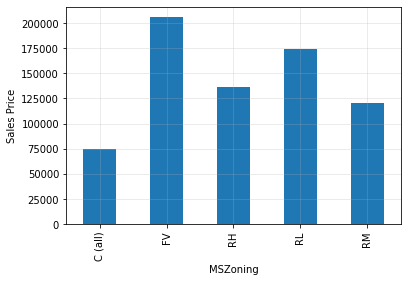

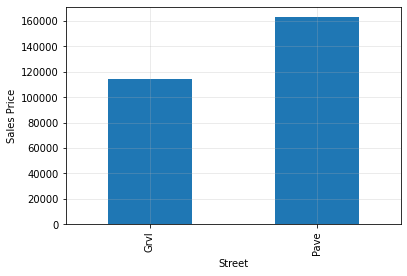

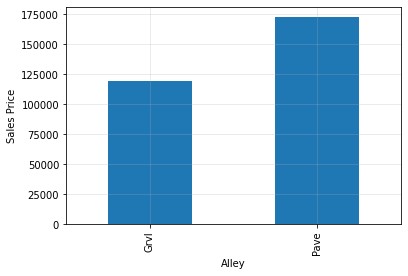

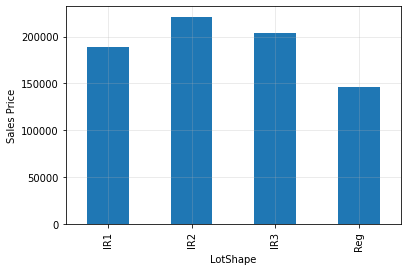

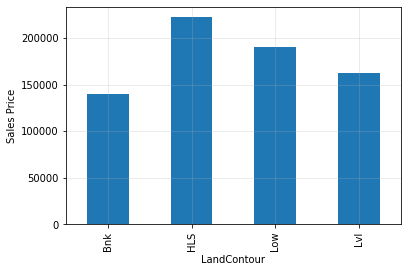

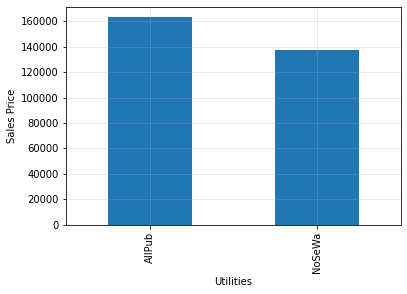

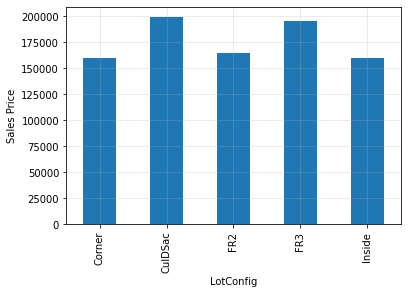

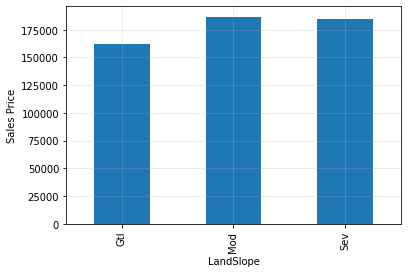

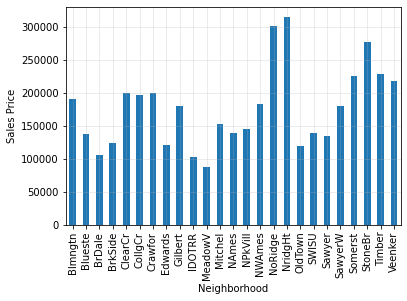

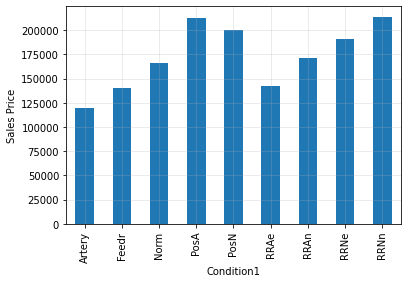

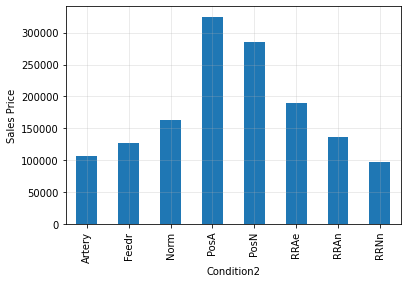

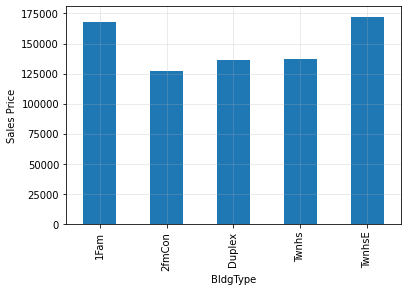

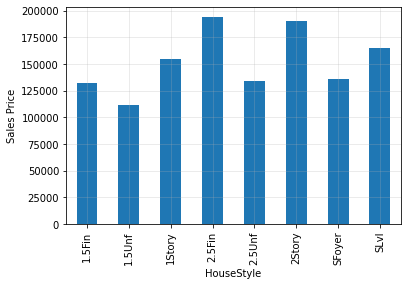

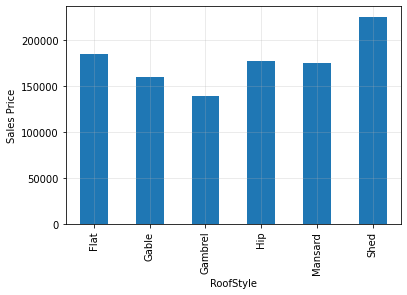

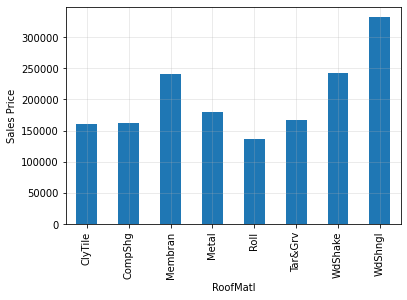

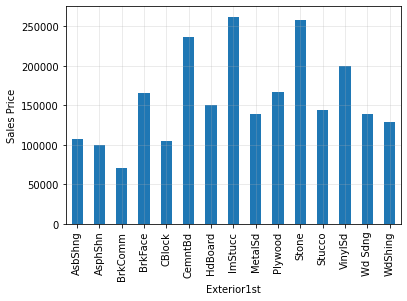

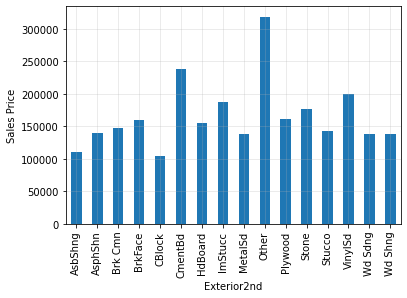

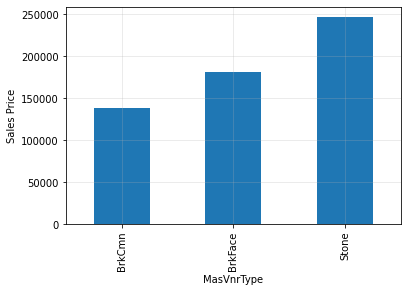

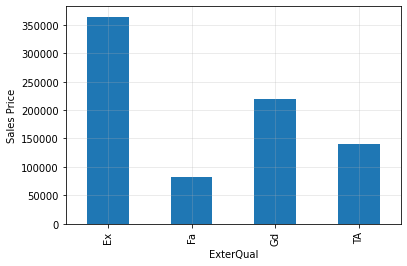

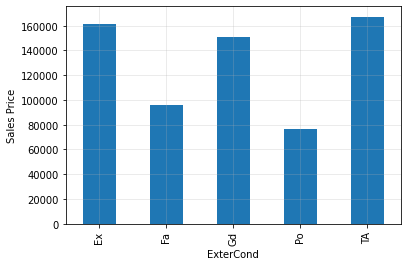

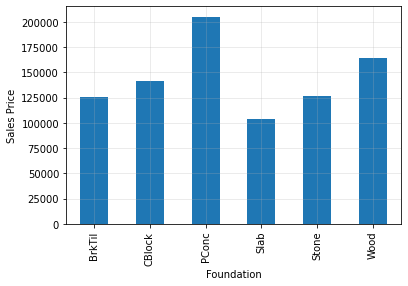

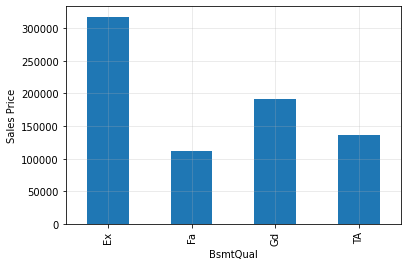

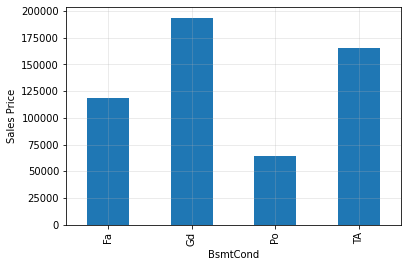

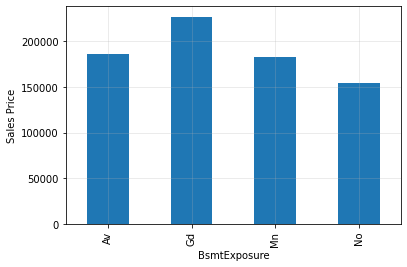

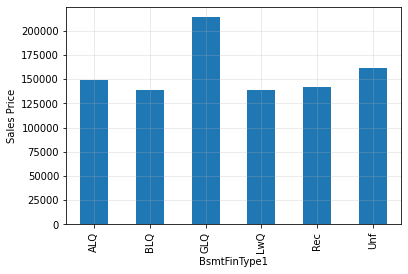

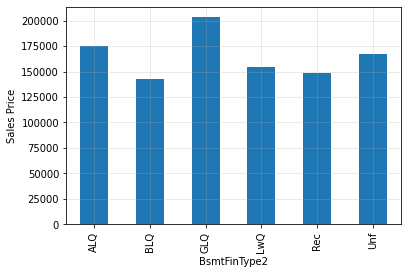

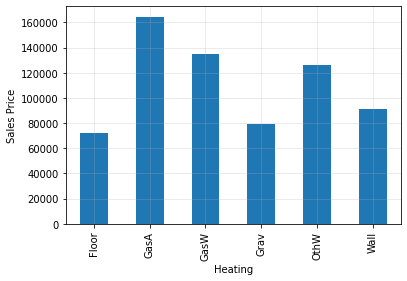

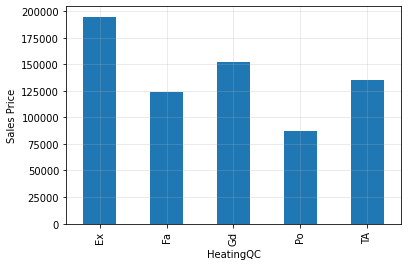

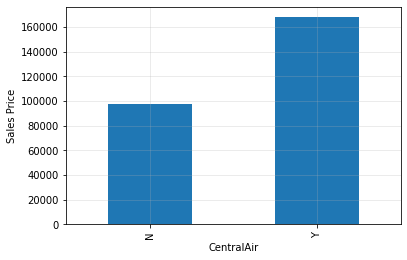

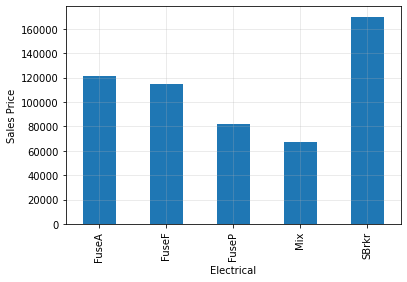

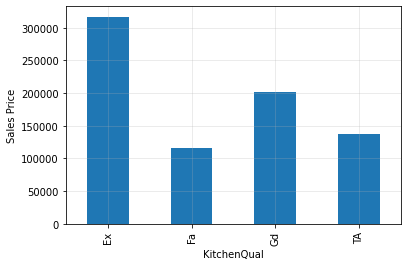

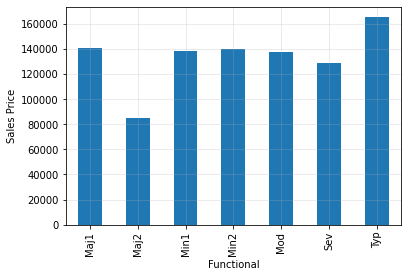

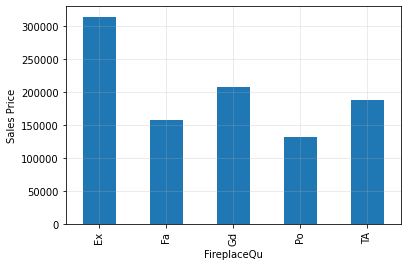

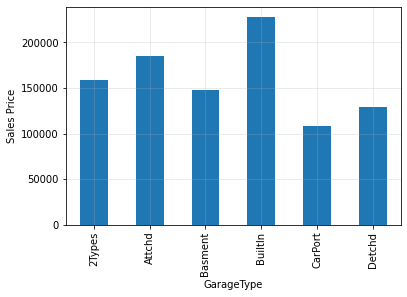

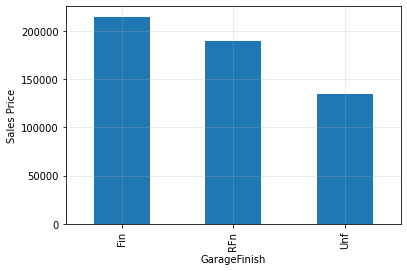

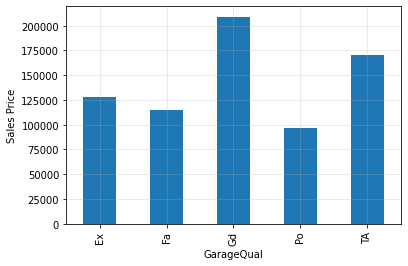

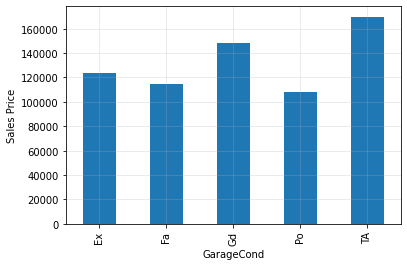

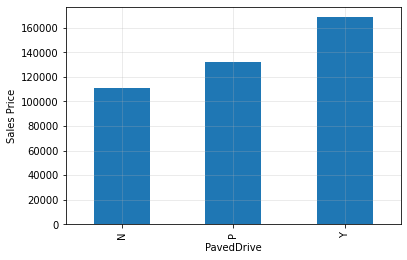

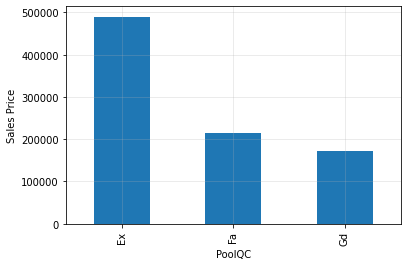

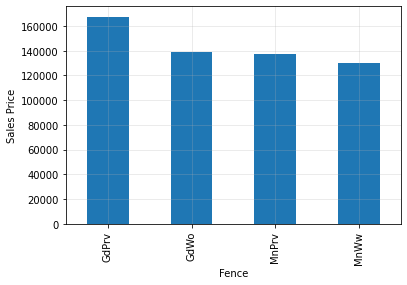

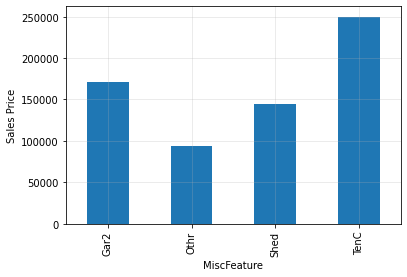

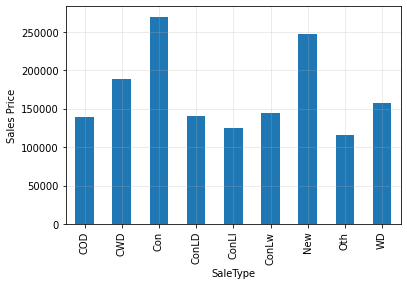

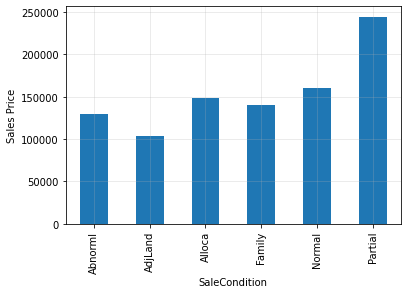

In [43]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.grid(alpha=0.3)
    plt.show()